In [1]:
!git clone https://github.com/nhoyh/HR_IMU_falldetection_dataset.git
!cd HR_IMU_falldetection_dataset

Cloning into 'HR_IMU_falldetection_dataset'...
remote: Enumerating objects: 460, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 460 (delta 28), reused 45 (delta 28), pack-reused 415 (from 1)
Receiving objects: 100% (460/460), 12.30 MiB | 12.70 MiB/s, done.
Resolving deltas: 100% (28/28), done.


In [2]:
!pip install scipy pandas numpy

In [3]:
ls

HR_IMU_falldetection_dataset/  sample_data/


In [4]:
import scipy.io

# Load a sample .mat file
mat = scipy.io.loadmat("/content/HR_IMU_falldetection_dataset/subject_01/fall/fall1.mat")

# Check the structure of the file
print(mat.keys())

dict_keys(['__header__', '__version__', '__globals__', 'time', 'w', 'x', 'y', 'z', 'droll', 'dpitch', 'dyaw', 'ax', 'ay', 'az', 'heart'])


In [5]:
# prompt: convert all .mat files in the dataset with structure HR_IMU_falldetection_dataset/subject_num/fall_or_nonfall/file.mat into csv files.
# save this new csv dataset.
# now take all the entries from the csv dataset, and combine them into one dataset. all data points have the same features.

import scipy.io
import pandas as pd
import os
import numpy as np

# Define the path to the dataset
dataset_path = "/content/HR_IMU_falldetection_dataset"

# Create a list to store all dataframes
all_dataframes = []

# Iterate through all subjects, fall/non-fall directories, and .mat files
for subject in os.listdir(dataset_path):
    # Skip hidden files or directories like .gitattributes and other files
    if subject.startswith('.') or not os.path.isdir(os.path.join(dataset_path, subject)):
        continue

    subject_dir = os.path.join(dataset_path, subject)
    if not os.path.isdir(subject_dir):
      continue

    for fall_type in ["fall", "non-fall"]:
        fall_dir = os.path.join(subject_dir, fall_type)
        for filename in os.listdir(fall_dir):
            if filename.endswith(".mat"):
                mat_file_path = os.path.join(fall_dir, filename)

                # Load the .mat file
                try:
                    mat = scipy.io.loadmat(mat_file_path)
                    # Get the minimum length among all arrays
                    min_len = min(len(mat[key].flatten()) for key in ["time", "w", "x", "y", "z", "droll", "dpitch", "dyaw", "ax", "ay", "az", "heart"] if key in mat)

                    # Extract data into a dictionary with consistent lengths
                    data_dict = {
                        # "time": mat["time"].flatten()[:min_len],
                        "w": mat["w"].flatten()[:min_len],
                        "x": mat["x"].flatten()[:min_len],
                        "y": mat["y"].flatten()[:min_len],
                        "z": mat["z"].flatten()[:min_len],
                        "droll": mat["droll"].flatten()[:min_len],
                        "dpitch": mat["dpitch"].flatten()[:min_len],
                        "dyaw": mat["dyaw"].flatten()[:min_len],
                        "ax": mat["ax"].flatten()[:min_len],
                        "ay": mat["ay"].flatten()[:min_len],
                        "az": mat["az"].flatten()[:min_len],
                        # "heart": mat["heart"].flatten()[:min_len]
                    }
                    data_dict['label'] = filename[:-4]
                    # Convert to DataFrame
                    all_dataframes.append(pd.DataFrame(data_dict))
                    print(f"Processed {mat_file_path}")
                except Exception as e:
                    print(f"Error processing {mat_file_path}: {e}")

# Concatenate all dataframes into one
if all_dataframes:
    combined_df = pd.concat(all_dataframes, ignore_index=True)

    # Save combined dataset as a CSV file
    combined_df.to_csv("/content/combined_dataset.csv", index=False)
    print("Combined dataset saved as combined_dataset.csv")
else:
    print("No .mat files found or processed.")


Processed /content/HR_IMU_falldetection_dataset/subject_21/fall/fall3.mat
Processed /content/HR_IMU_falldetection_dataset/subject_21/fall/fall1.mat
Processed /content/HR_IMU_falldetection_dataset/subject_21/fall/fall2.mat
Processed /content/HR_IMU_falldetection_dataset/subject_21/fall/fall4.mat
Processed /content/HR_IMU_falldetection_dataset/subject_21/fall/fall5.mat
Processed /content/HR_IMU_falldetection_dataset/subject_21/non-fall/eat.mat
Processed /content/HR_IMU_falldetection_dataset/subject_21/non-fall/clap.mat
Processed /content/HR_IMU_falldetection_dataset/subject_21/non-fall/teeth.mat
Processed /content/HR_IMU_falldetection_dataset/subject_21/non-fall/chair.mat
Processed /content/HR_IMU_falldetection_dataset/subject_21/non-fall/stair.mat
Processed /content/HR_IMU_falldetection_dataset/subject_21/non-fall/write.mat
Processed /content/HR_IMU_falldetection_dataset/subject_21/non-fall/zip.mat
Processed /content/HR_IMU_falldetection_dataset/subject_21/non-fall/cloth.mat
Processed /

In [6]:
df = pd.read_csv("/content/combined_dataset.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381394 entries, 0 to 381393
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   w       381394 non-null  float64
 1   x       381394 non-null  float64
 2   y       381394 non-null  float64
 3   z       381394 non-null  float64
 4   droll   381394 non-null  float64
 5   dpitch  381394 non-null  float64
 6   dyaw    381394 non-null  float64
 7   ax      381394 non-null  float64
 8   ay      381394 non-null  float64
 9   az      381394 non-null  float64
 10  label   381394 non-null  object 
dtypes: float64(10), object(1)
memory usage: 32.0+ MB


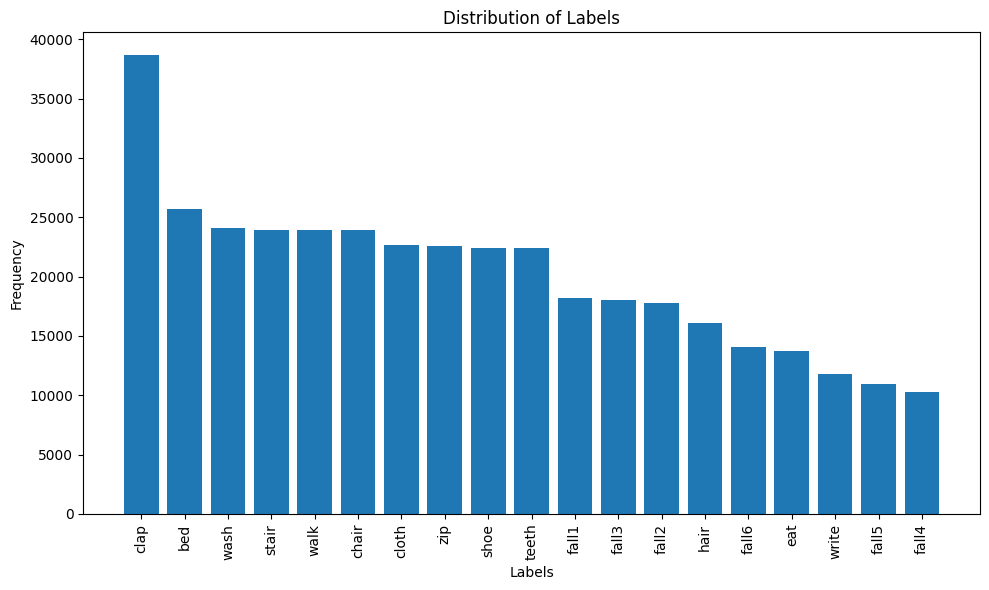

In [7]:
# prompt: use matplotlib to create a bar graph with distribution of labels

import matplotlib.pyplot as plt

# Assuming 'dataset' DataFrame is already loaded as in the previous code

# Count the occurrences of each label
label_counts = df['label'].value_counts()

# Create the bar graph
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
plt.bar(label_counts.index, label_counts.values)
plt.xlabel("Labels")
plt.ylabel("Frequency")
plt.title("Distribution of Labels")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability if needed
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


In [8]:
x = df.drop(['label'], axis=1)
y = df['label']
x.head(), x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381394 entries, 0 to 381393
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   w       381394 non-null  float64
 1   x       381394 non-null  float64
 2   y       381394 non-null  float64
 3   z       381394 non-null  float64
 4   droll   381394 non-null  float64
 5   dpitch  381394 non-null  float64
 6   dyaw    381394 non-null  float64
 7   ax      381394 non-null  float64
 8   ay      381394 non-null  float64
 9   az      381394 non-null  float64
dtypes: float64(10)
memory usage: 29.1 MB


(        w       x       y       z  droll  dpitch  dyaw     ax     ay     az
 0  0.1288  0.4937  0.0966  0.8545    0.0     0.0   0.0  0.002 -0.012  0.000
 1  0.1285  0.4937  0.0967  0.8545    1.4     0.3  -0.2  0.005 -0.006  0.000
 2  0.1282  0.4938  0.0969  0.8545    1.3     0.0  -0.3  0.009  0.003 -0.006
 3  0.1280  0.4938  0.0971  0.8545    0.5     0.0  -0.3  0.013  0.009 -0.008
 4  0.1281  0.4938  0.0974  0.8545    0.0     0.0   0.0  0.009  0.009 -0.011,
 None)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

Training samples: 305115, Testing samples: 76279


In [10]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=20, max_samples=X_train.shape[0]//10, min_samples_split=100, verbose=1)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   16.6s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   31.1s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished


Model Accuracy: 0.71
              precision    recall  f1-score   support

         bed       0.65      0.49      0.56      5162
       chair       0.69      0.73      0.71      4773
        clap       0.96      0.89      0.93      7716
       cloth       0.56      0.35      0.43      4462
         eat       0.80      0.33      0.47      2731
       fall1       0.94      0.79      0.86      3753
       fall2       0.92      0.84      0.88      3534
       fall3       0.95      0.86      0.91      3535
       fall4       0.98      0.83      0.90      2060
       fall5       0.97      0.83      0.89      2149
       fall6       0.98      0.84      0.90      2899
        hair       0.69      0.58      0.63      3233
        shoe       0.58      0.81      0.68      4452
       stair       0.56      0.64      0.60      4773
       teeth       0.56      0.82      0.66      4420
        walk       0.53      0.70      0.60      4759
        wash       0.58      0.79      0.67      4912
      

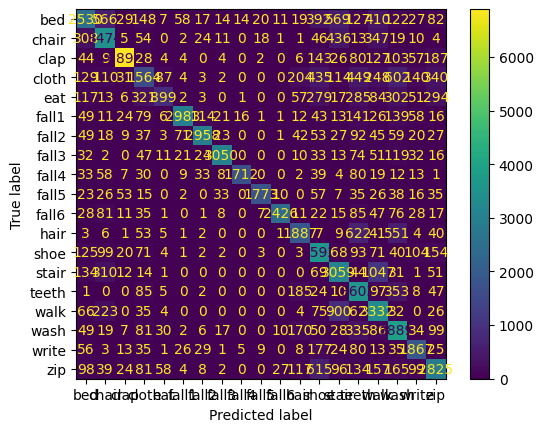

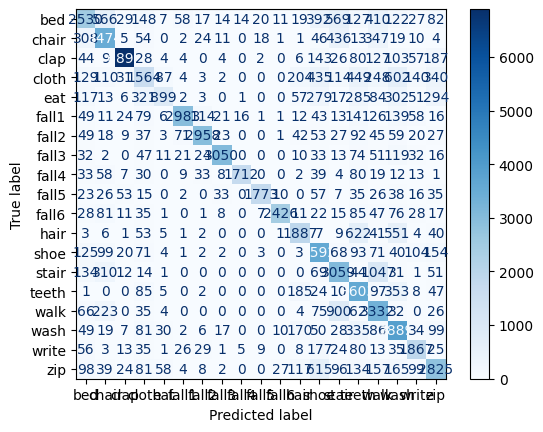

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Print Classification Report
print(classification_report(y_test, y_pred))

# Print Confusion Matrix
print("Confusion Matrix:")
conf = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred).plot(cmap='Blues')

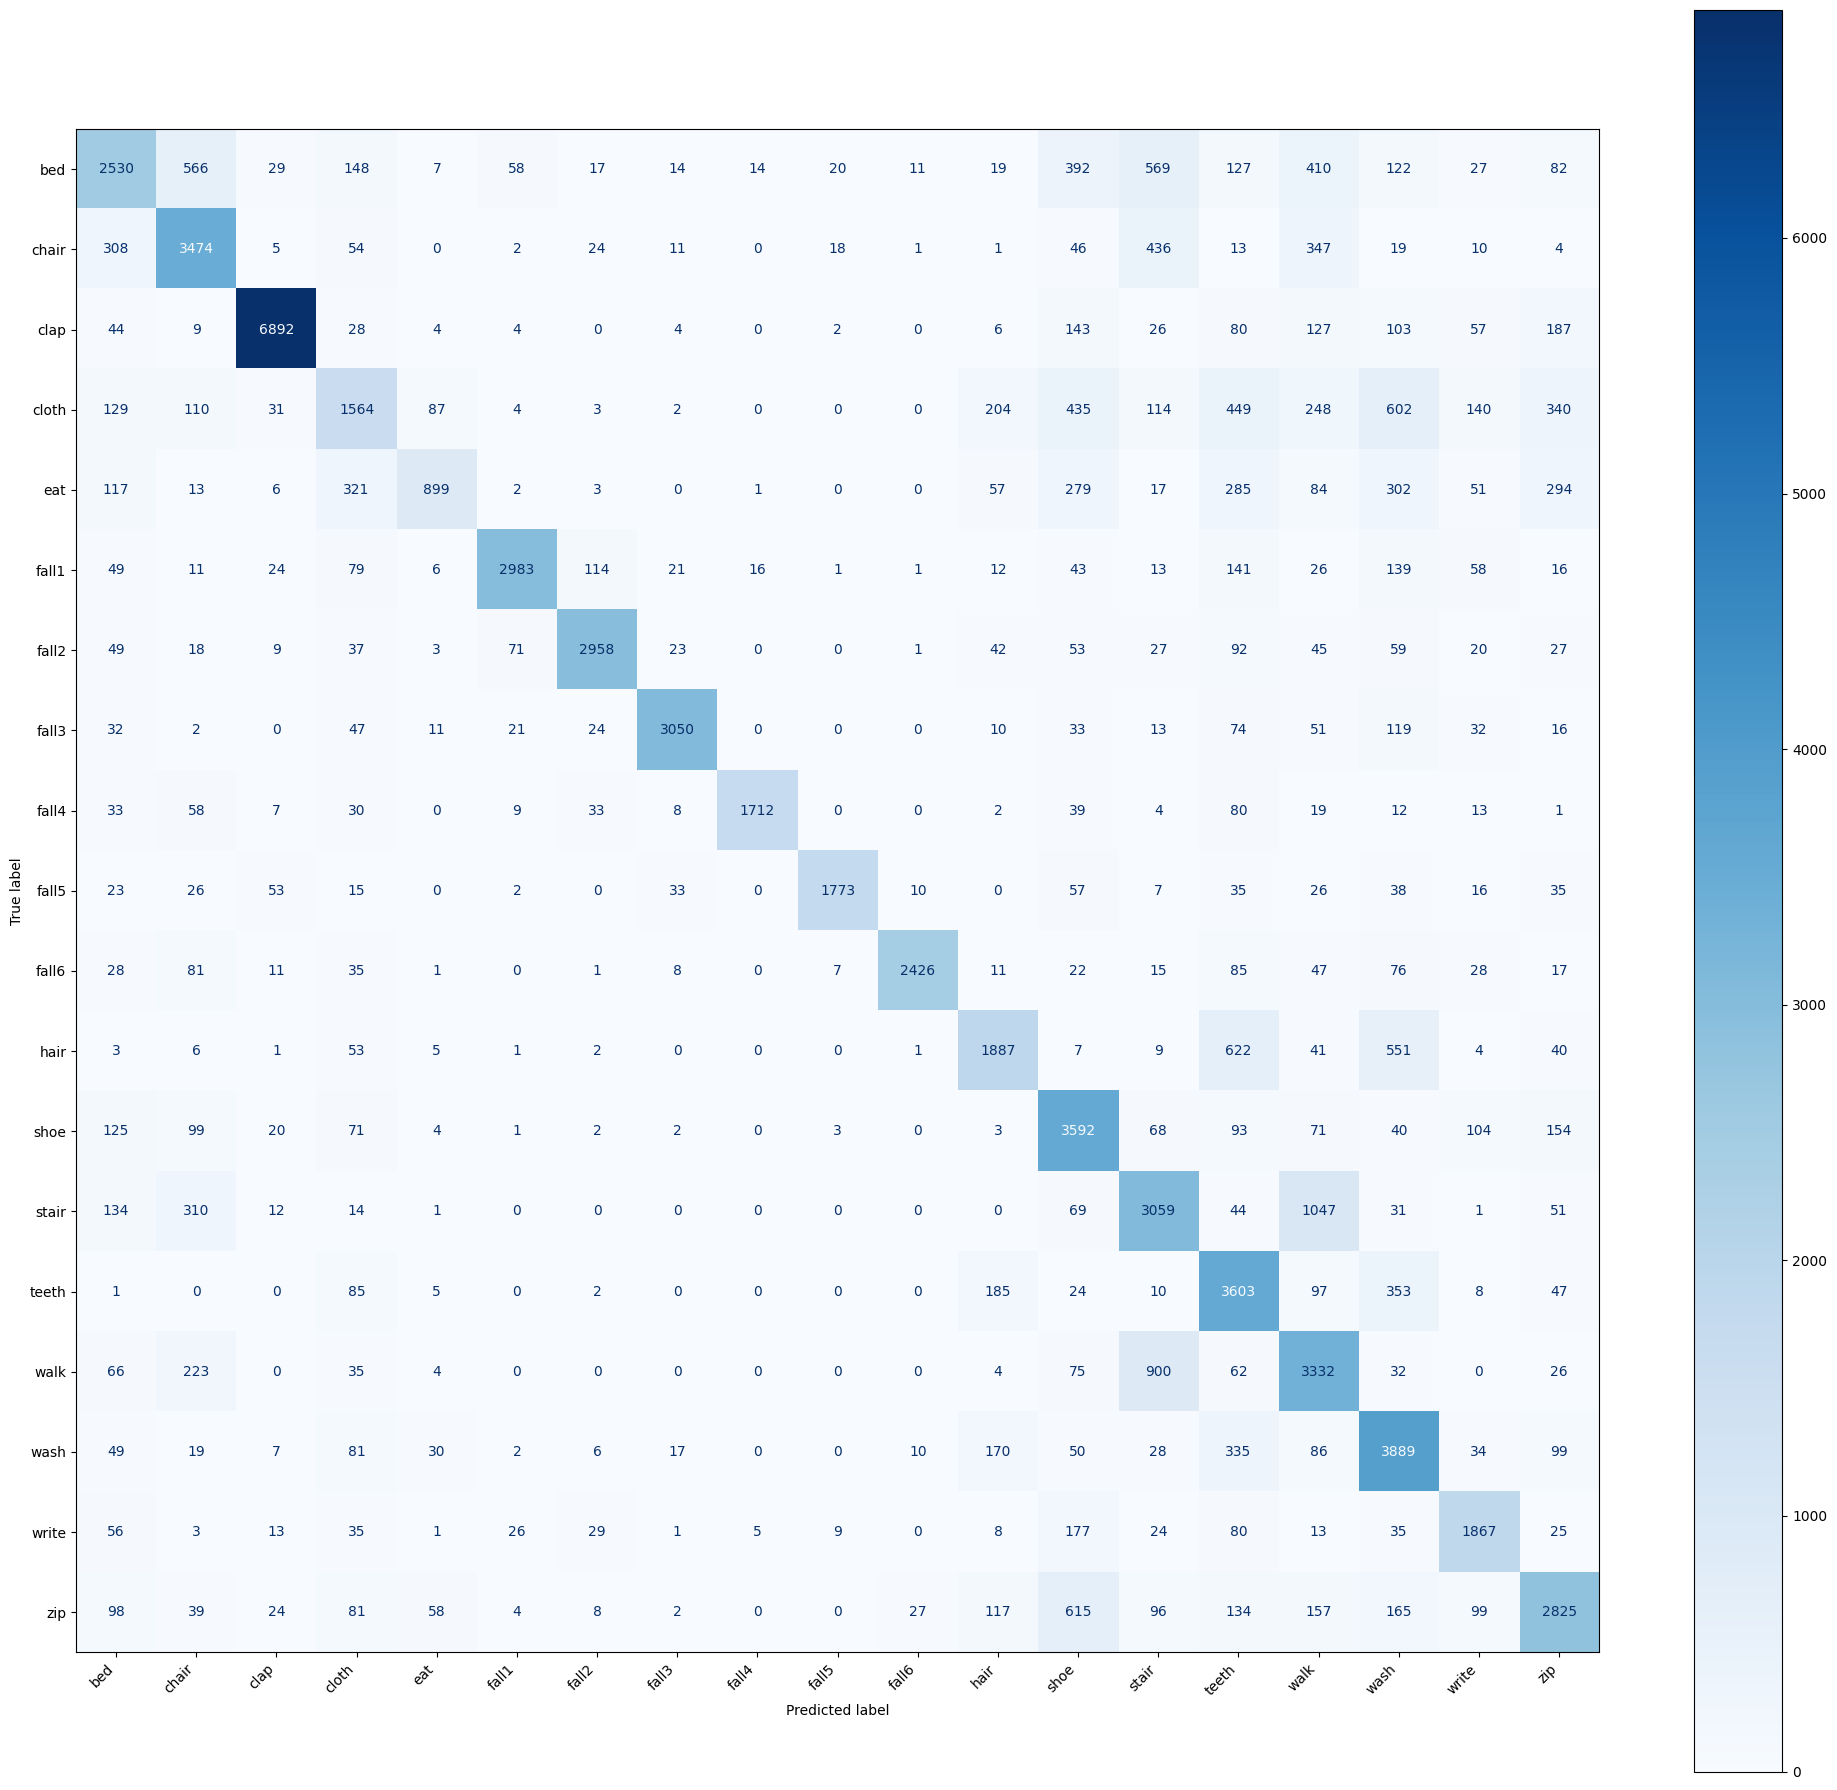

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Create a figure with a larger size first
fig, ax = plt.subplots(figsize=(20, 18))

# Create and plot the confusion matrix on this specific axes
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues', ax=ax)

# Improve readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Adjust layout to ensure everything fits
plt.tight_layout()

# Display the plot
plt.show()

In [13]:
import pickle

with open("rf.pkl", "wb") as f:
  pickle.dump(model, f)

# XGBoost



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:26:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.81
              precision    recall  f1-score   support

         bed       0.76      0.55      0.64      5162
       chair       0.76      0.87      0.81      4773
        clap       0.94      0.94      0.94      7716
       cloth       0.67      0.59      0.63      4462
         eat       0.79      0.64      0.71      2731
       fall1       0.93      0.89      0.91      3753
       fall2       0.95      0.86      0.91      3534
       fall3       0.98      0.94      0.96      3535
       fall4       0.98      0.88      0.93      2060
       fall5       0.97      0.89      0.93      2149
       fall6       0.98      0.89      0.93      2899
        hair       0.78      0.87      0.82      3233
        shoe       0.69      0.90      0.78      4452
       stair       0.68      0.82      0.74      4773
       teeth       0.80      0.83      0.82      4420
        walk       0.76      0.73      0.74      4759
        wash       0.78      0.80      0.79      4912
    

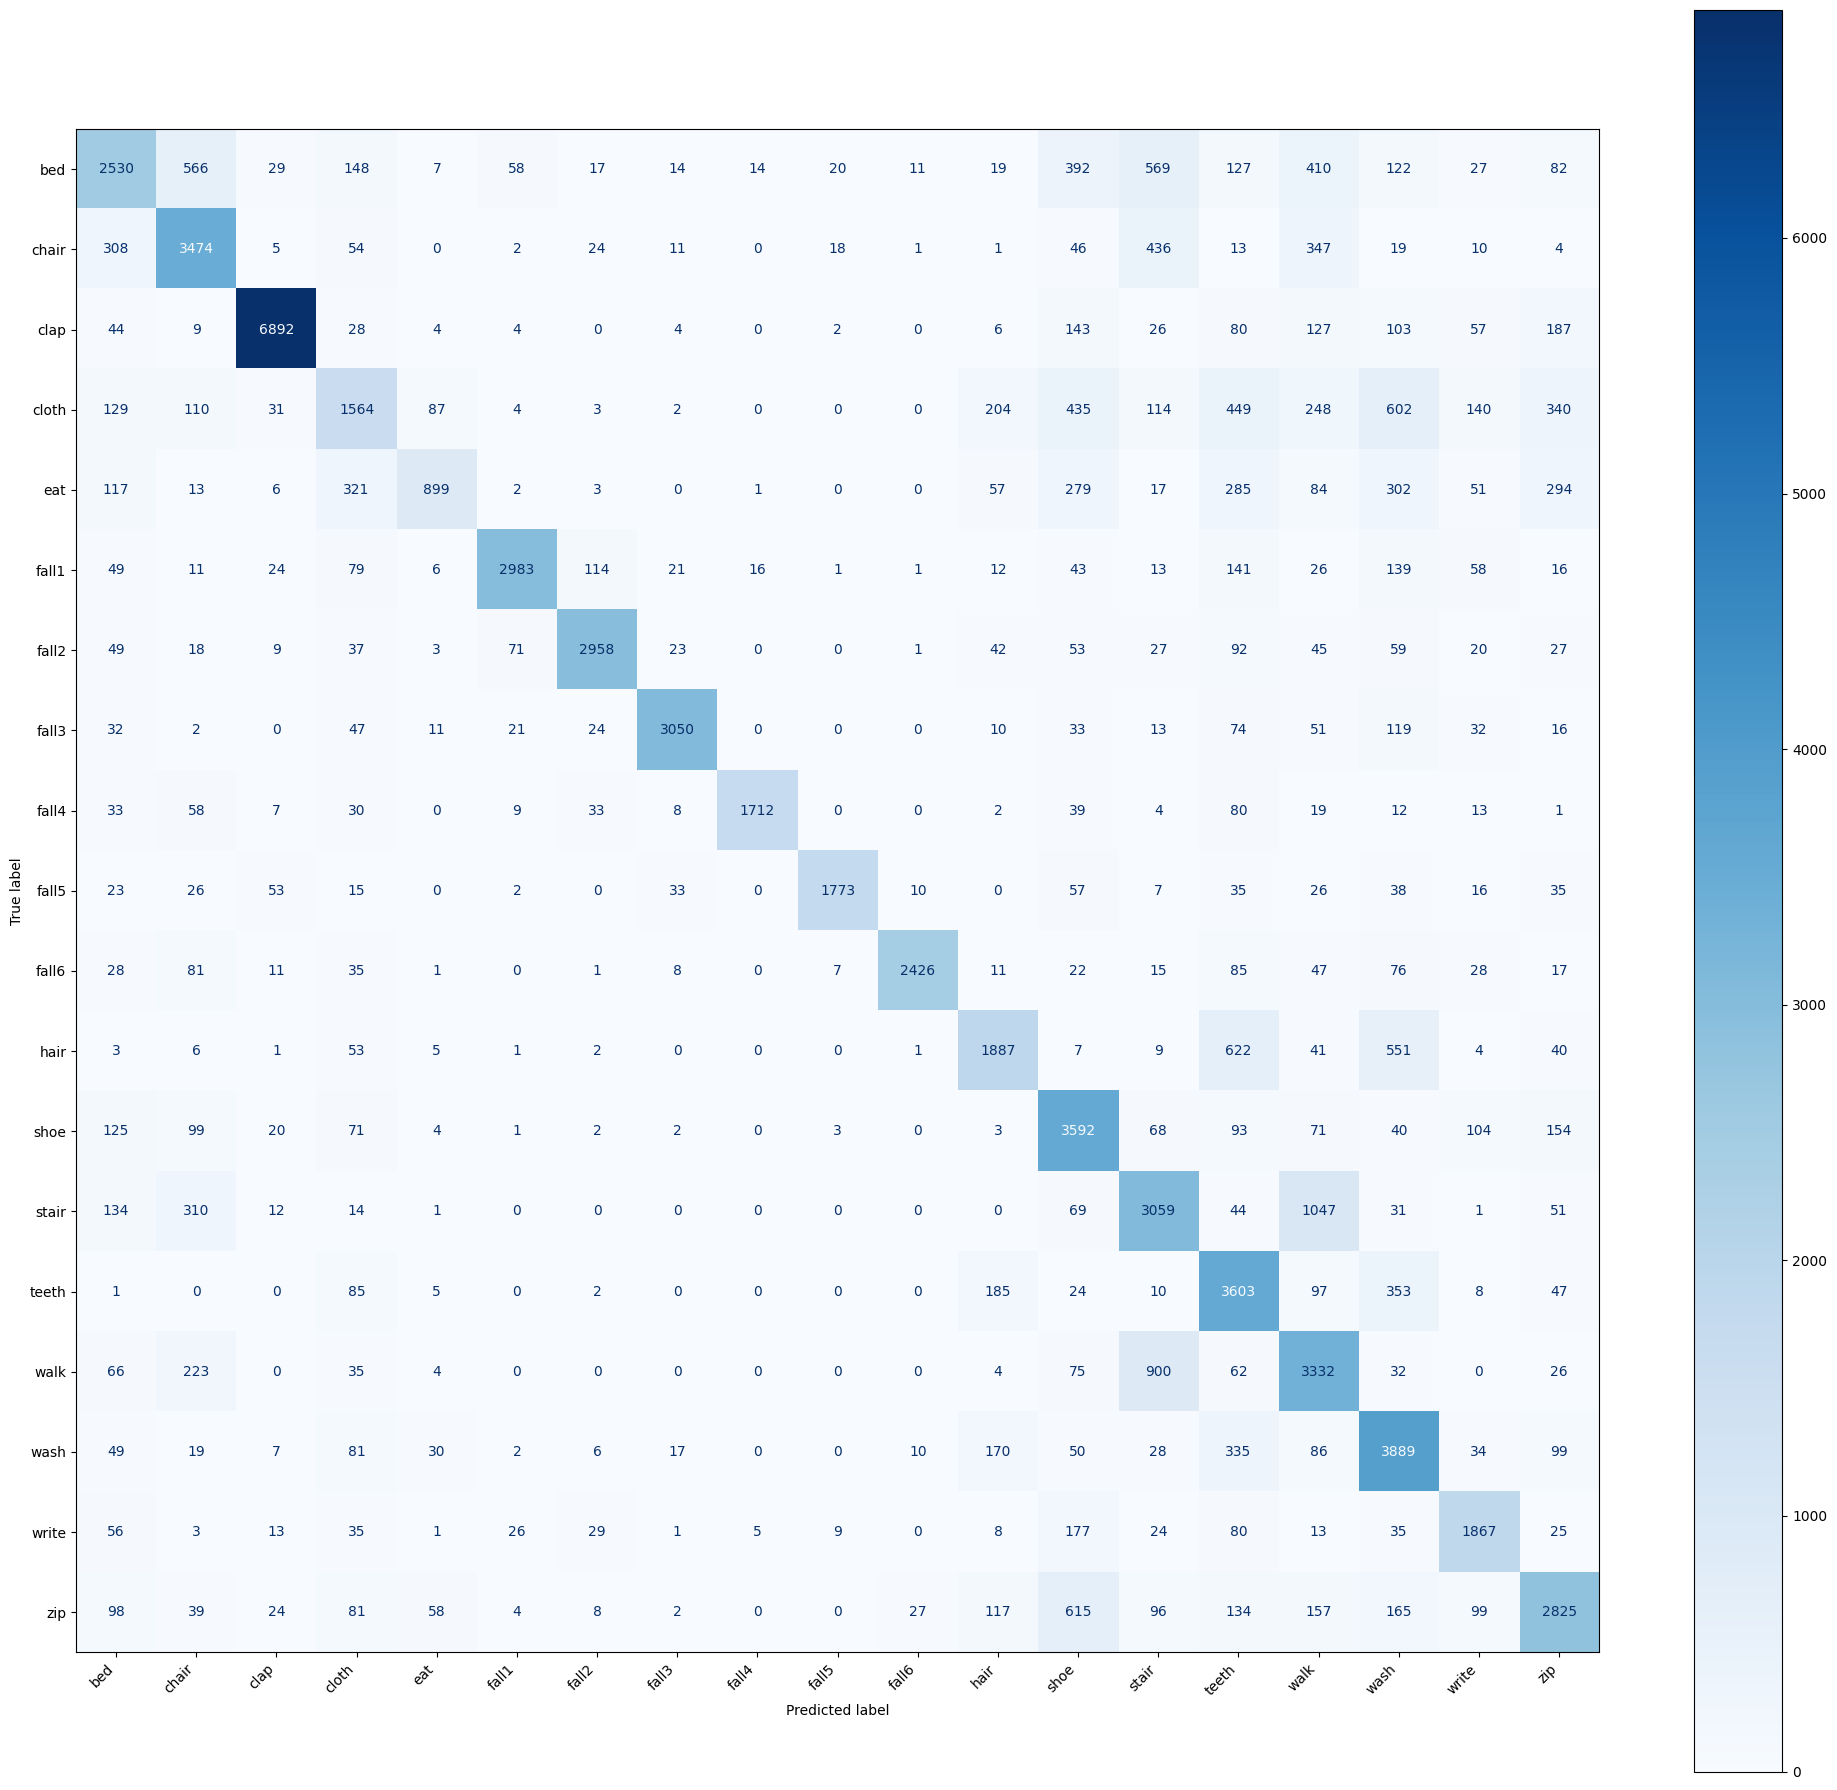

In [14]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit the LabelEncoder to your training labels and transform them
y_train_encoded = le.fit_transform(y_train)

# Initialize the XGBoost model
model_xgb = XGBClassifier(n_estimators=100, learning_rate=0.01, max_depth=10, use_label_encoder=False, eval_metric='mlogloss')

# Train the model
model_xgb.fit(X_train, y_train_encoded)

# Make predictions
y_pred_xgb = model_xgb.predict(X_test)

# Transform predictions back to original labels if needed
y_pred_decoded = le.inverse_transform(y_pred_xgb)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_decoded)
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")

print(classification_report(y_test, y_pred_decoded))

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Create a figure with a larger size first
fig, ax = plt.subplots(figsize=(20, 18))

# Create and plot the confusion matrix on this specific axes
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues', ax=ax)

# Improve readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Adjust layout to ensure everything fits
plt.tight_layout()

# Display the plot
plt.show()

In [15]:
with open('xgb_model', 'wb') as f:
  pickle.dump(model_xgb, f)

# Catboost

In [16]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.5 MB/s eta 0:00:00


0:	learn: 2.9026371	total: 3.75s	remaining: 6m 11s
1:	learn: 2.8645702	total: 7.49s	remaining: 6m 6s
2:	learn: 2.8285297	total: 15.3s	remaining: 8m 16s
3:	learn: 2.7949686	total: 21.3s	remaining: 8m 30s
4:	learn: 2.7616523	total: 28.6s	remaining: 9m 3s
5:	learn: 2.7320005	total: 34.3s	remaining: 8m 57s
6:	learn: 2.7032618	total: 37.4s	remaining: 8m 17s
7:	learn: 2.6740139	total: 41.6s	remaining: 7m 57s
8:	learn: 2.6472592	total: 44.4s	remaining: 7m 29s
9:	learn: 2.6212495	total: 47.3s	remaining: 7m 6s
10:	learn: 2.5959491	total: 50.2s	remaining: 6m 46s
11:	learn: 2.5714725	total: 54.4s	remaining: 6m 39s
12:	learn: 2.5475695	total: 57.3s	remaining: 6m 23s
13:	learn: 2.5258099	total: 1m	remaining: 6m 9s
14:	learn: 2.5046716	total: 1m 3s	remaining: 5m 57s
15:	learn: 2.4848129	total: 1m 7s	remaining: 5m 52s
16:	learn: 2.4647572	total: 1m 10s	remaining: 5m 42s
17:	learn: 2.4444938	total: 1m 13s	remaining: 5m 32s
18:	learn: 2.4251058	total: 1m 15s	remaining: 5m 23s
19:	learn: 2.4074180	total

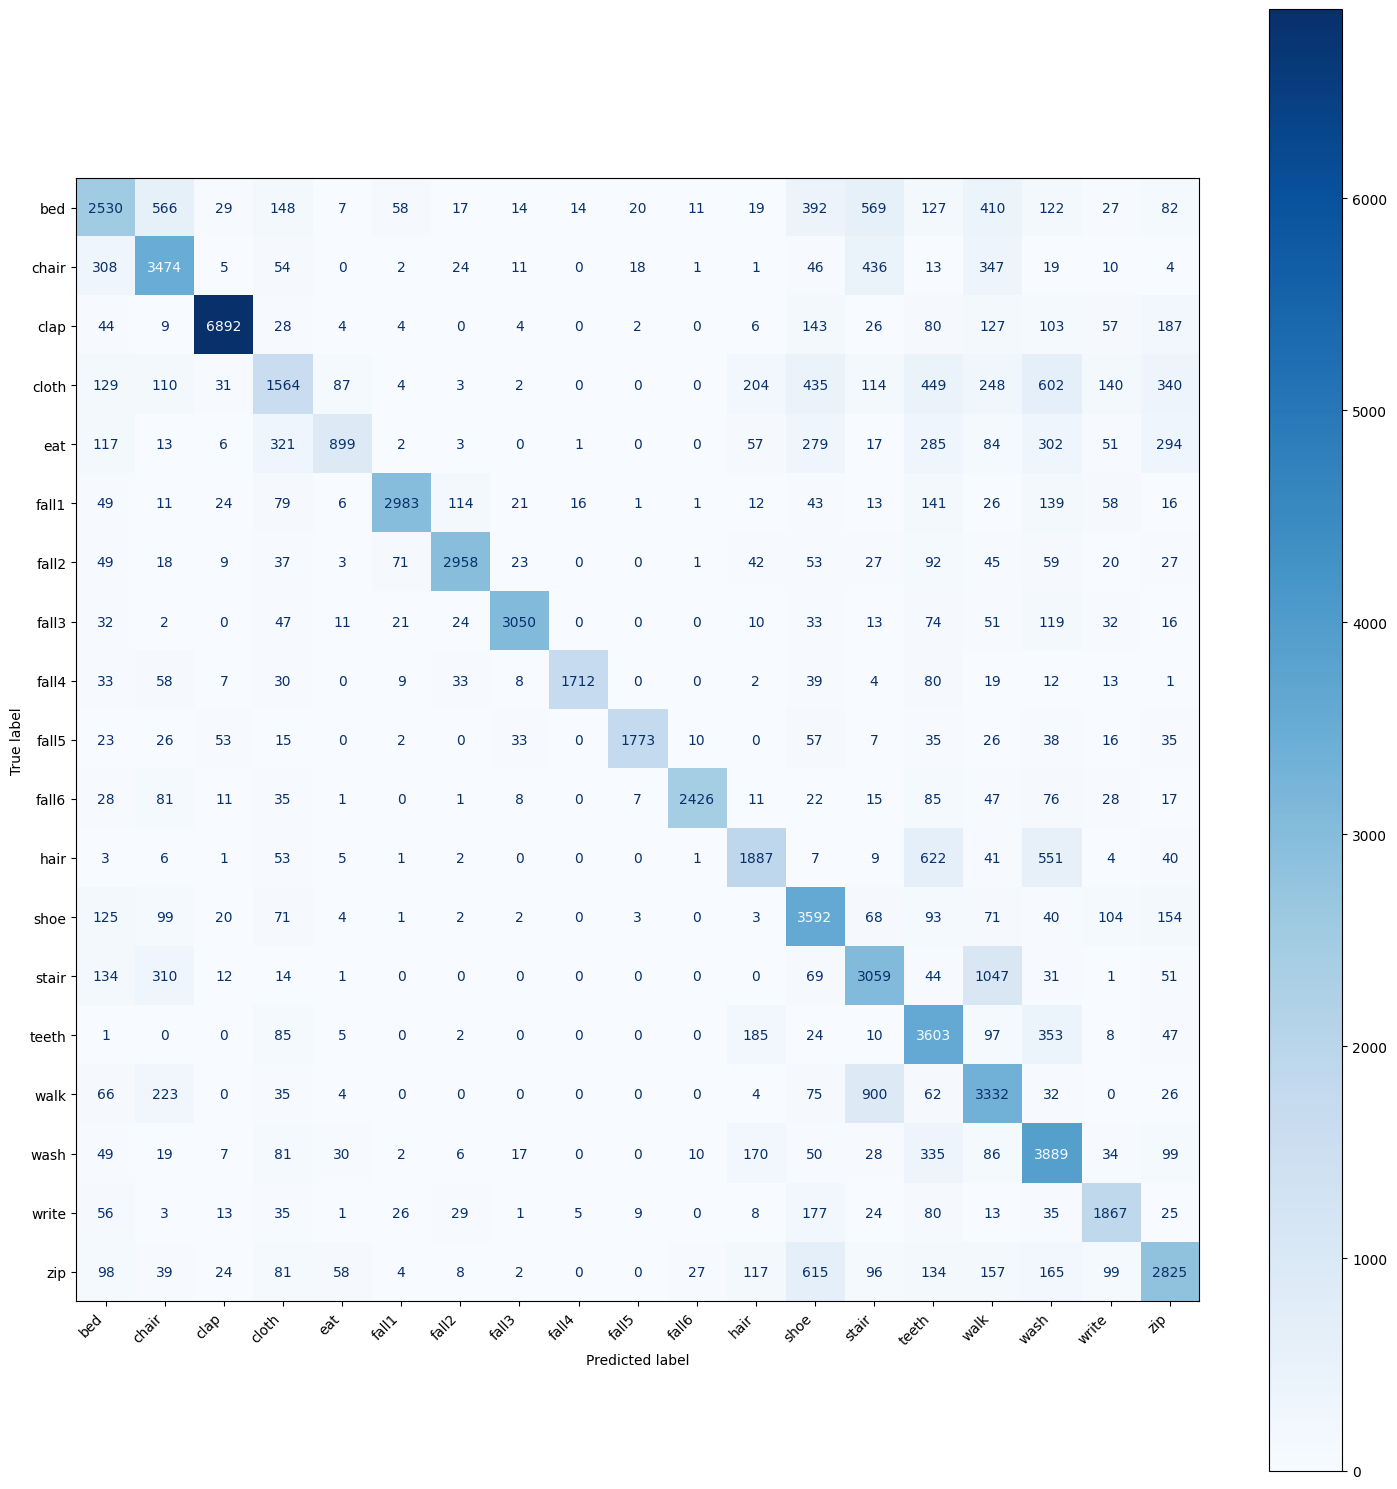

In [17]:
from catboost import CatBoostClassifier


model_catboost = CatBoostClassifier(iterations=100, learning_rate=0.01, depth=10, loss_function='MultiClass')

# Train the model
model_catboost.fit(X_train, y_train, verbose=1)

# Make predictions
y_pred_catboost = model_catboost.predict(X_test)

# Evaluate the model
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
print(f"CatBoost Accuracy: {accuracy_catboost:.2f}")

print(classification_report(y_test, y_pred_catboost))
# Create a figure with a larger size first
fig, ax = plt.subplots(figsize=(15, 15))

# Create and plot the confusion matrix on this specific axes
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues', ax=ax)

# Improve readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Adjust layout to ensure everything fits
plt.tight_layout()

# Display the plot
plt.show()


In [18]:
with open('cb.pkl', 'wb') as f:
  pickle.dump(model_catboost, f)

# **KNN**

KNN Accuracy: 0.93
              precision    recall  f1-score   support

         bed       0.91      0.93      0.92      5148
       chair       0.94      0.96      0.95      4783
        clap       0.98      0.99      0.98      7730
       cloth       0.85      0.84      0.85      4540
         eat       0.87      0.90      0.88      2750
       fall1       0.93      0.92      0.93      3645
       fall2       0.94      0.92      0.93      3562
       fall3       0.98      0.96      0.97      3601
       fall4       0.97      0.95      0.96      2056
       fall5       0.98      0.95      0.97      2186
       fall6       0.99      0.96      0.97      2822
        hair       0.90      0.93      0.92      3222
        shoe       0.92      0.92      0.92      4482
       stair       0.93      0.92      0.92      4787
       teeth       0.91      0.90      0.91      4480
        walk       0.92      0.95      0.94      4784
        wash       0.93      0.90      0.91      4826
       w

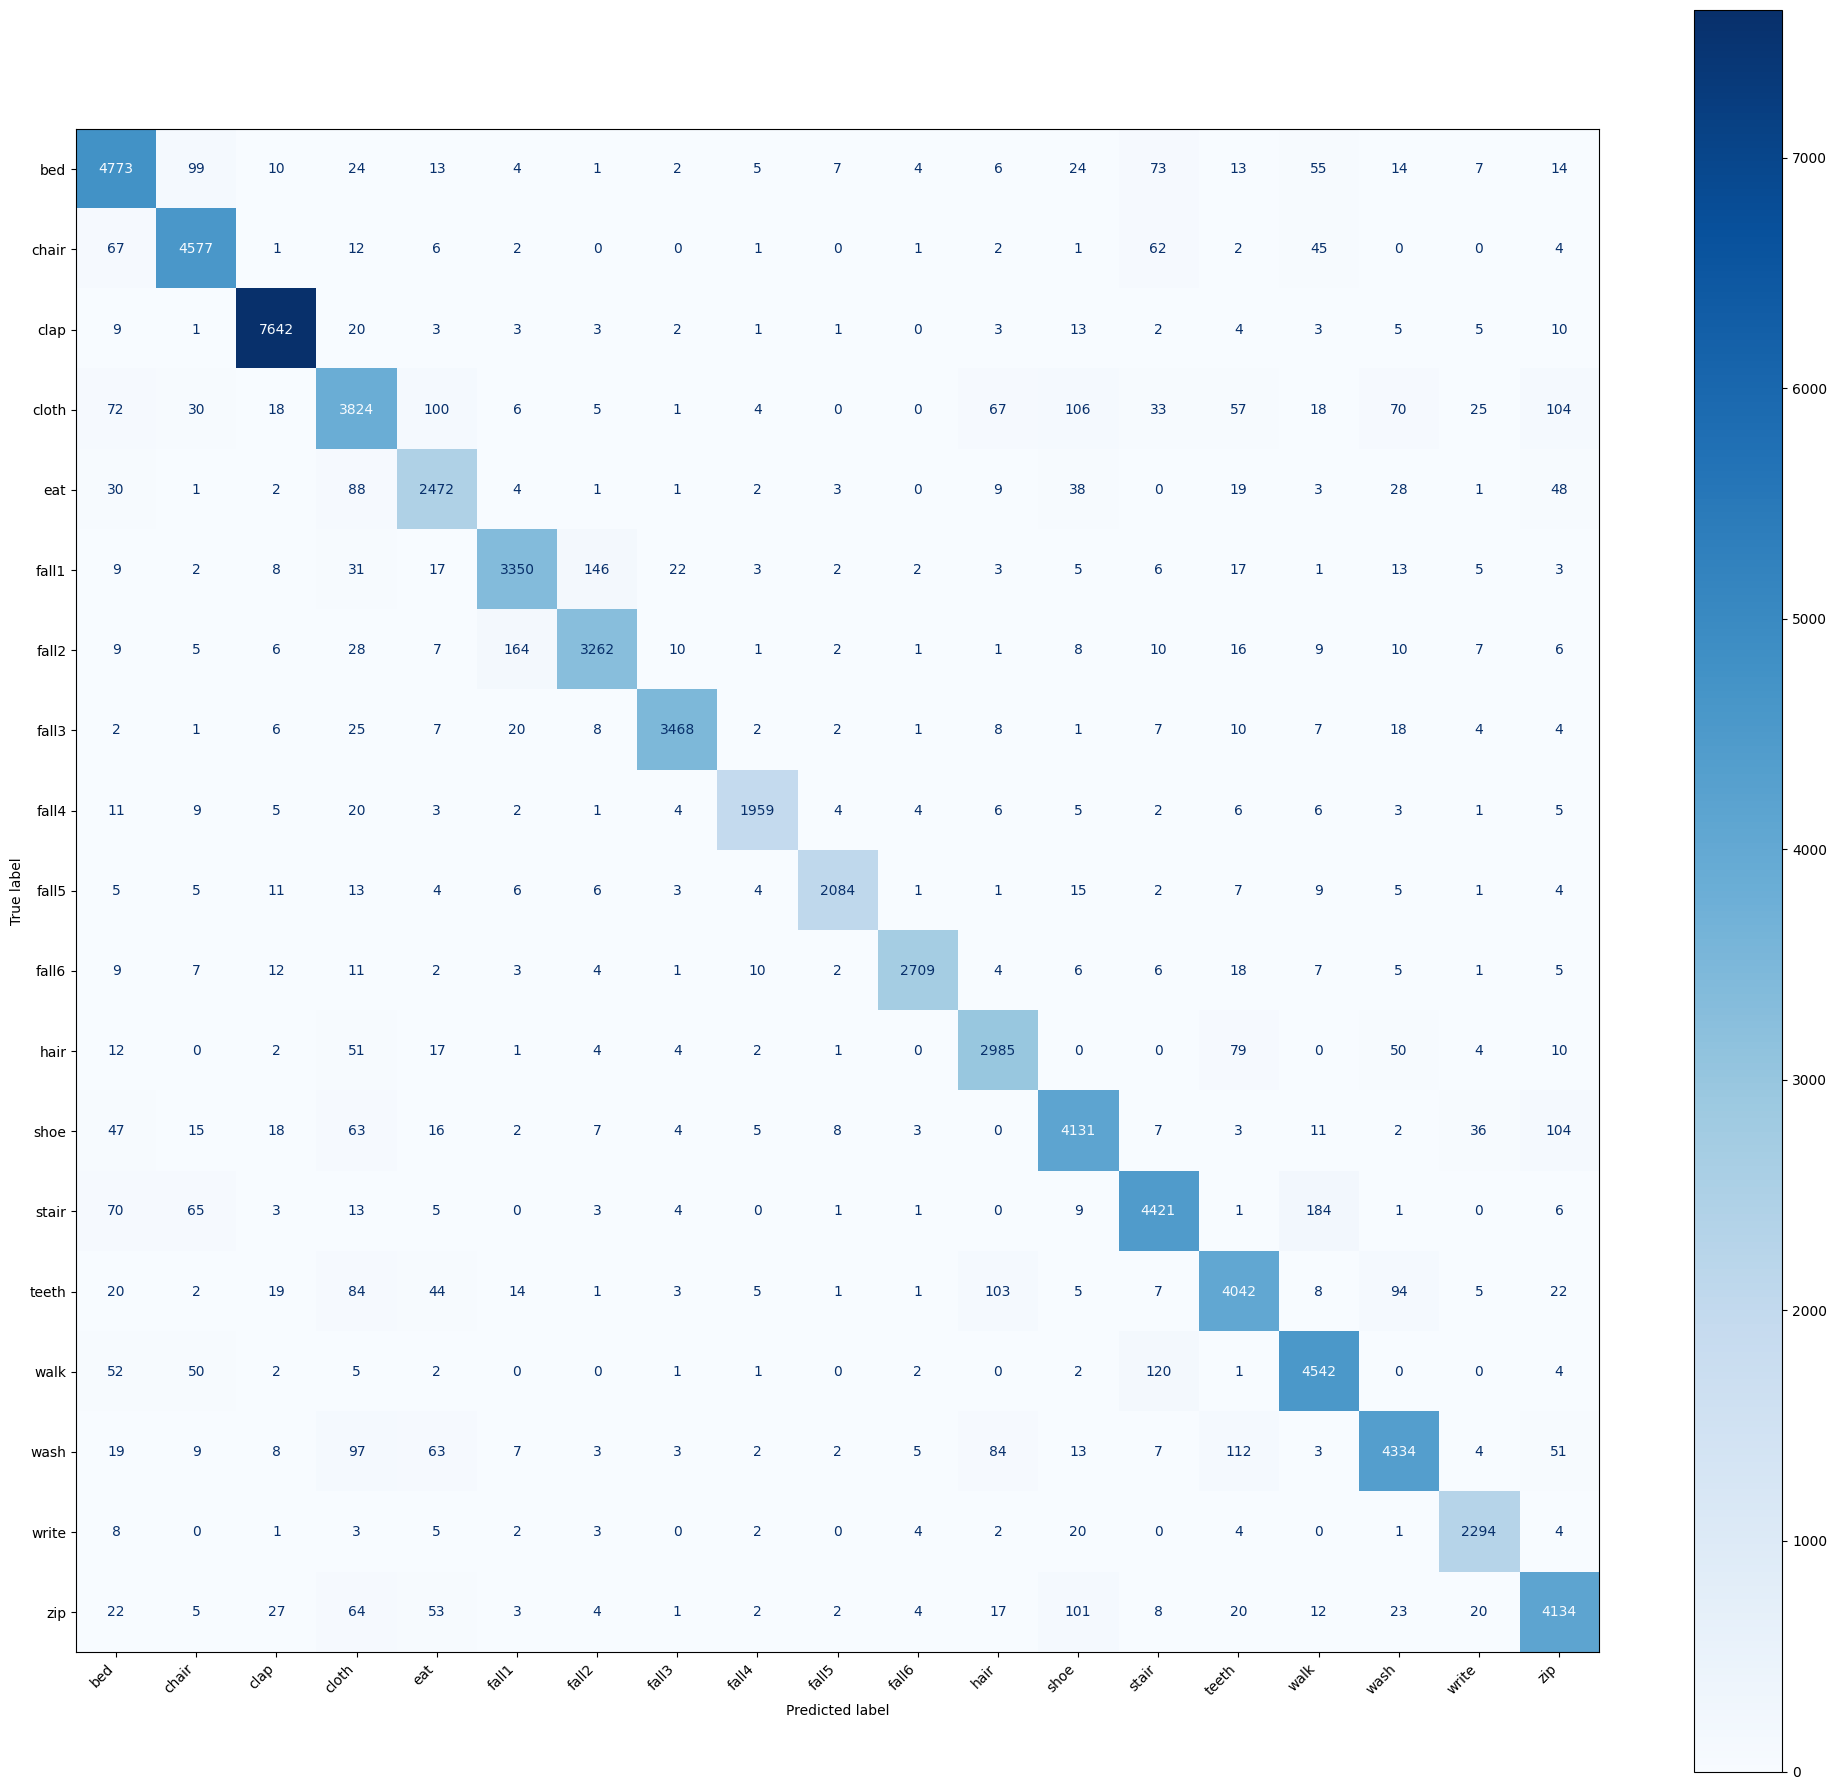

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred_knn = model_knn.predict(X_test_scaled)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2f}")

print(classification_report(y_test, y_pred_knn))

# Create a figure with a larger size first
fig, ax = plt.subplots(figsize=(20, 18))

# Create and plot the confusion matrix on this specific axes
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, cmap='Blues', ax=ax)

# Improve readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Adjust layout to ensure everything fits
plt.tight_layout()

# Display the plot
plt.show()

In [21]:
import pickle

# Save KNN model
with open('knn_model.pkl', 'wb') as f:
    pickle.dump(model_knn, f)
